# Correlating Joeri's learning courses with thesis grades (pre/post 2014)

## Reading in libraries/data

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy
import datetime

os.chdir('C:\\Users\\yeachan153\\Desktop\\Methodology-Consulting\\Project')
data = pd.read_csv('Master Dataframe.csv')

def to_strptime(string):
    try:
        return datetime.datetime.strptime(string, "%Y-%m-%d")
    except Exception as e:
        print(e)
        
data['Start Date'] = data['Start Date'].apply(to_strptime)
filter_14 = datetime.datetime.strptime('2014-09-01', "%Y-%m-%d")
pre_data = data[data['Start Date'] < filter_14]
post_data = data[data['Start Date'] >= filter_14]

learning = list(data)[12:15]
print(learning)

# Post 2014- All learning courses available
post0 = post_data[post_data[learning[0]].notnull()]
post1 = post_data[post_data[learning[1]].notnull()]
post2 = post_data[post_data[learning[2]].notnull()]

# Pre 2014 - Only learning course 'Propedeusethese' available at that time
pre1 = pre_data[pre_data[learning[1]].notnull()]

['Pract. Onderzoek & Rapp.', 'Propedeusethese', 'Wetens. en Stat. Redeneren']


In [12]:
print('Only ' + learning[1] + ' was available pre 2014')

Only Propedeusethese was available pre 2014


### Running correlations for 'Propedeusethese' PRE and POST 2014

SpearmanrResult(correlation=0.46635484953540474, pvalue=0.00010274723213000933)
SpearmanrResult(correlation=0.3665472075246699, pvalue=0.0021095947168315206)


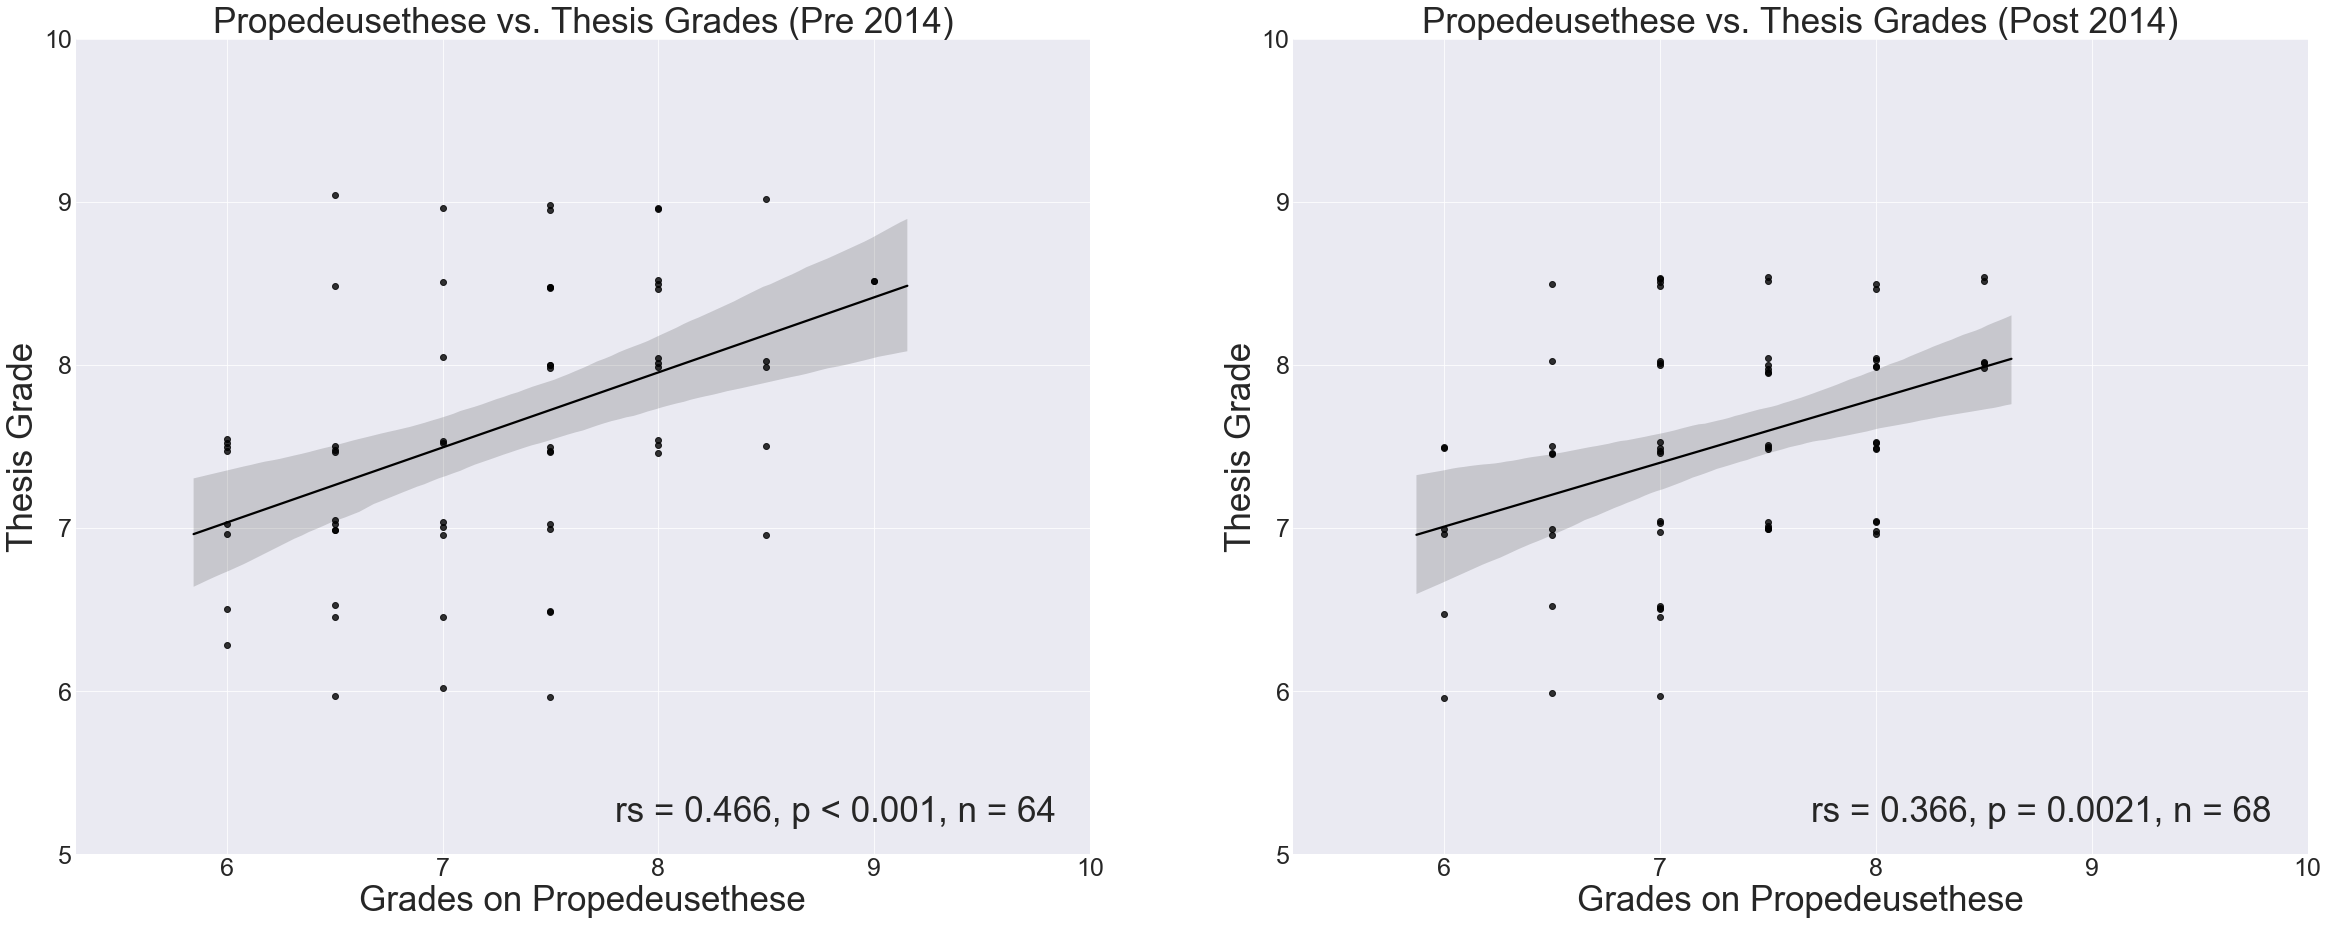

In [30]:
print(stats.spearmanr(pre1['thesis_grades'], pre1[learning[1]])) # rs = 0.466, p < 0.001, n = 64
print(stats.spearmanr(post1['thesis_grades'], post1[learning[1]])) # rs = 0.366, p = 0.0021, n = 68

list_select = [pre1, post1]

title = [learning[1] + ' vs. Thesis Grades (Pre 2014)', learning[1] + ' vs. Thesis Grades (Post 2014)']
text = ['rs = 0.466, p < 0.001, n = 64', 'rs = 0.366, p = 0.0021, n = 68']

fig = plt.figure(figsize = (40,15))
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    sns.regplot(list_select[i][learning[1]], list_select[i]['thesis_grades'], color = 'black', y_jitter = 0.05)
    sns.set_style('darkgrid')
    ax.set_title(title[i], fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.xlabel('Grades on ' + learning[1], fontsize = 35)
    plt.ylabel('Thesis Grade', fontsize = 35)
    ax.set_ylim(5,10)
    ax.set_xlim(5.3,10)
    if i == 0:
        ax.text(7.8, 5.2, text[i], fontsize = 35)
    if i == 1:
        ax.text(7.7, 5.2, text[i], fontsize = 35)

### Running correlations for 'Pract. Onderzoek & Rapp.' and 'Wetens. en Stat. Redeneren' (ONLY POST 2014 because no student who started before 2014 has these grades)

In [37]:
print(stats.spearmanr(post0['thesis_grades'], post0[learning[0]])) # rs = 0.412, p = 0.0017, n = 55
print(stats.spearmanr(post2['thesis_grades'], post2[learning[2]])) # rs = 0.179, p = 0.190, n = 55

SpearmanrResult(correlation=0.4128321879018819, pvalue=0.0017343027217488081)
SpearmanrResult(correlation=0.1791063298410817, pvalue=0.19074183312483883)


### Plotting  'Pract. Onderzoek & Rapp.'

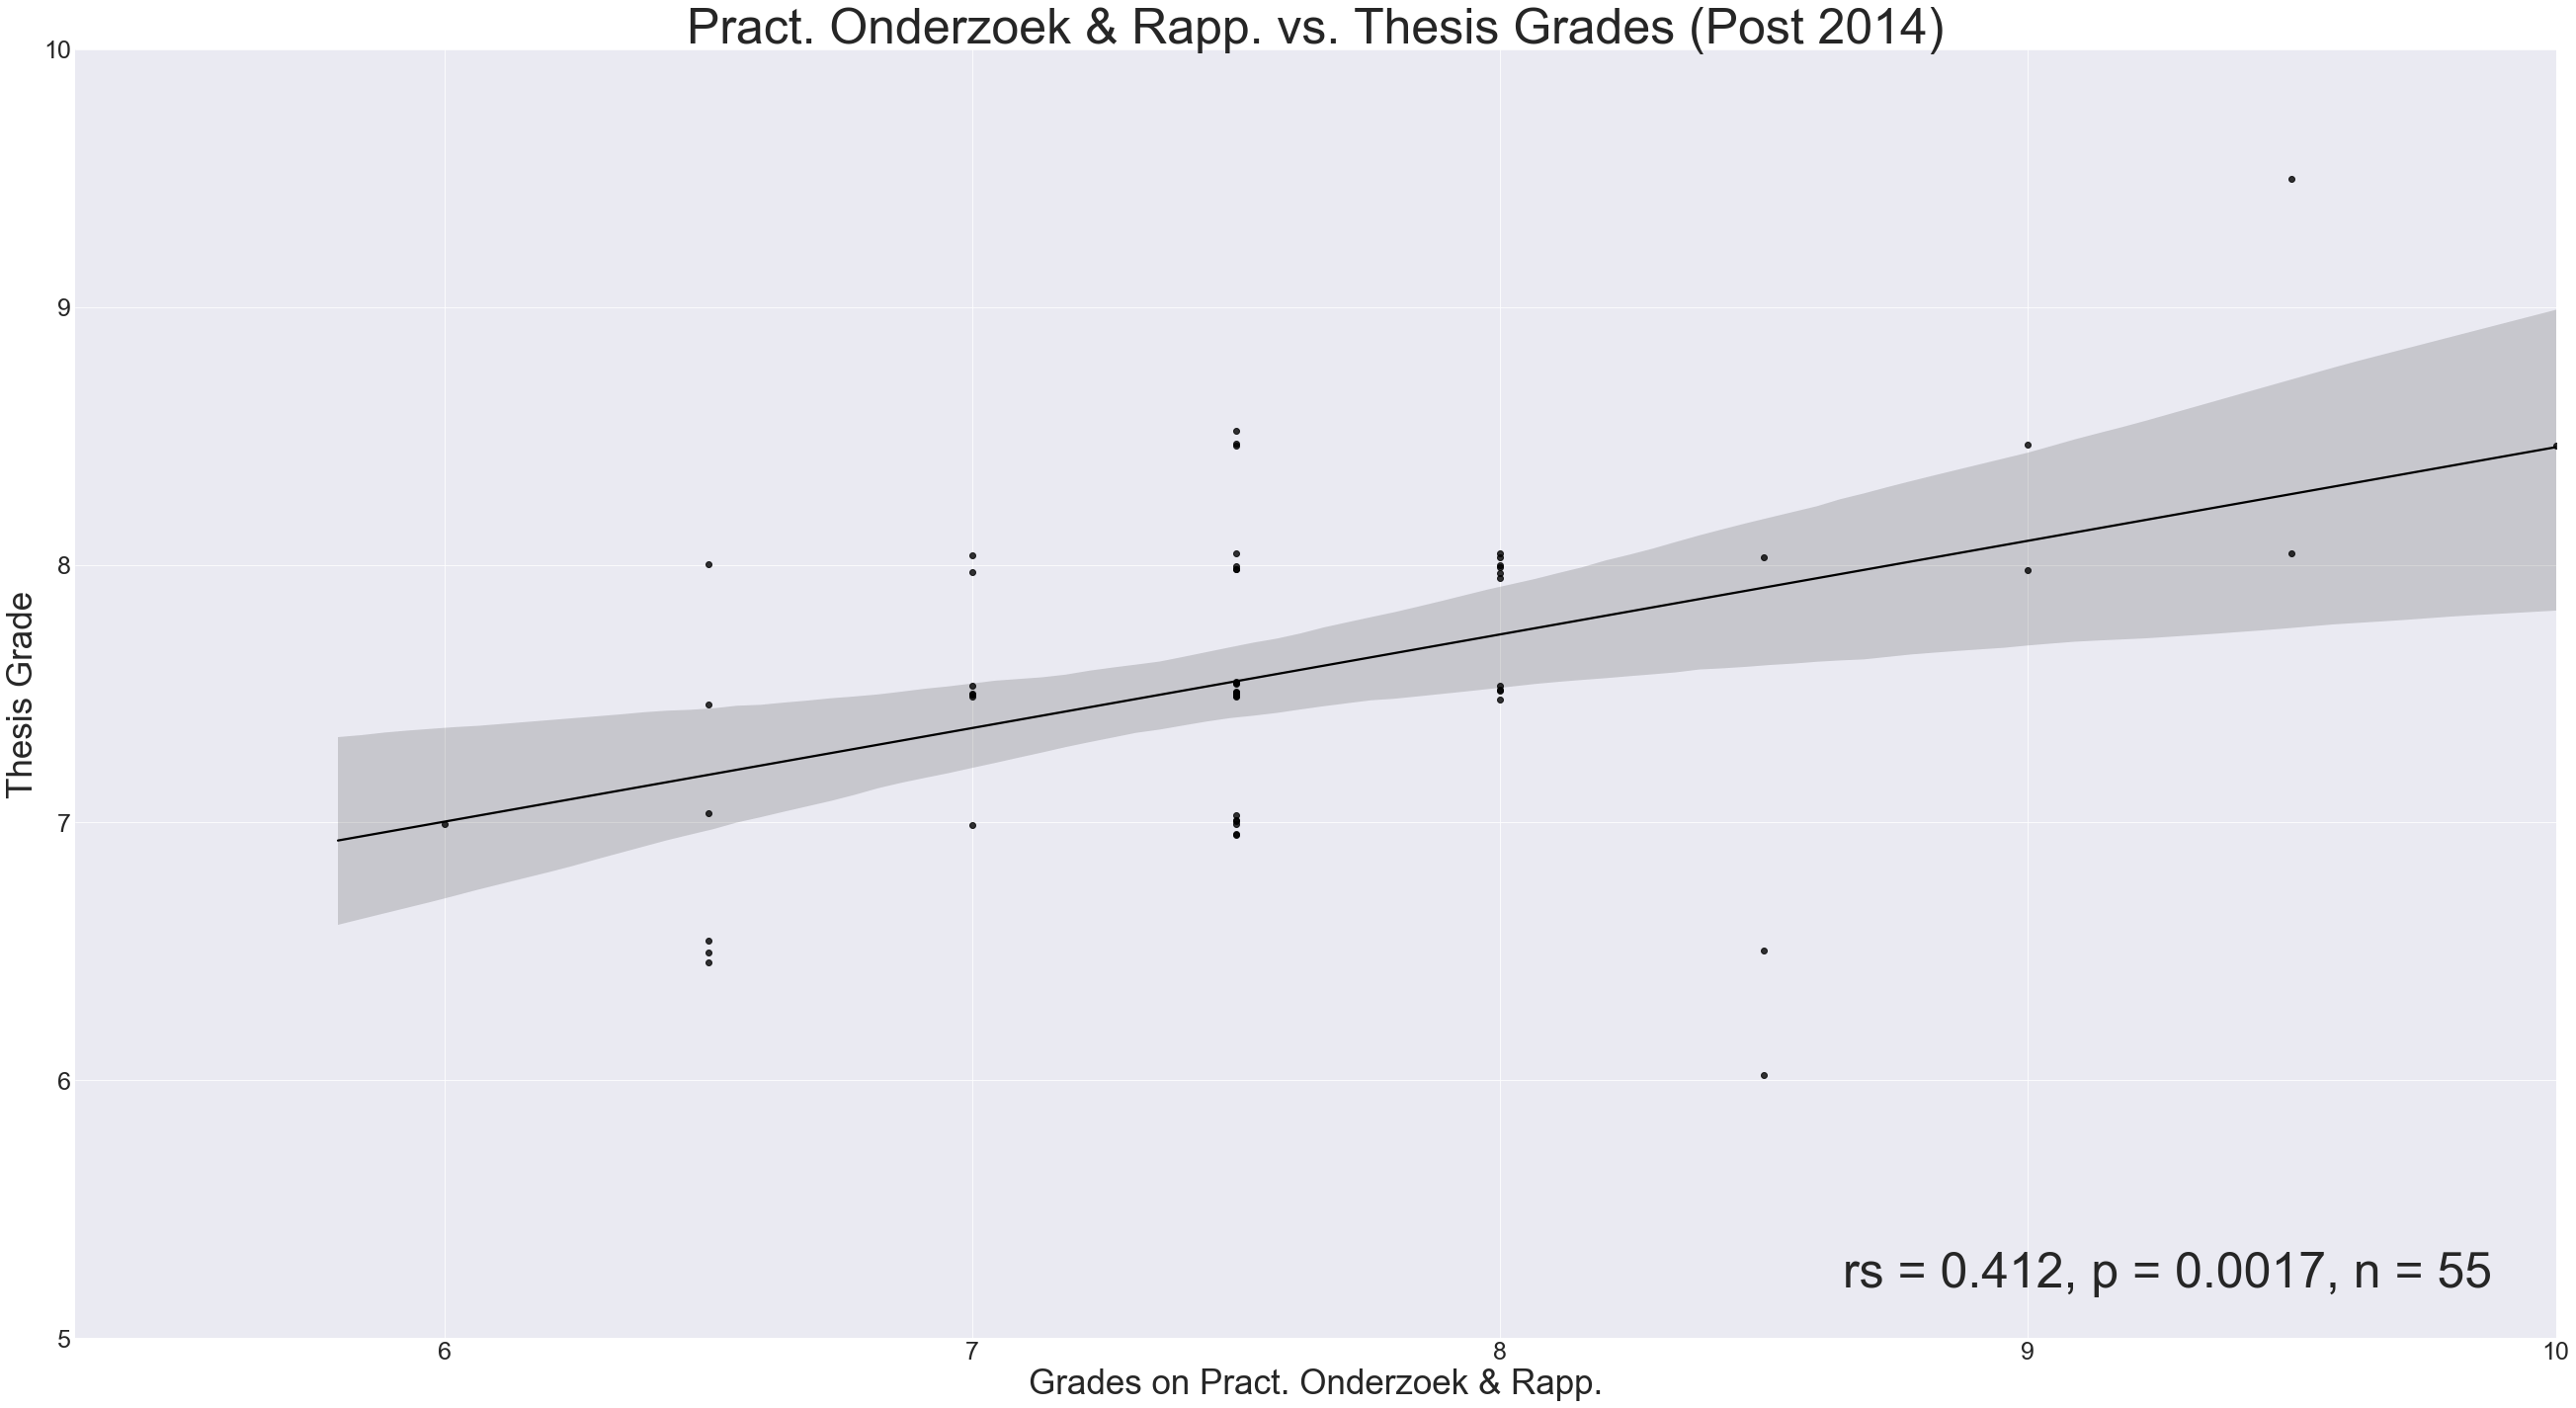

In [62]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(post0['Pract. Onderzoek & Rapp.'], post0['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('Grades on ' + learning[0], fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title(learning[0] + ' vs. Thesis Grades (Post 2014)', fontsize = 50)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_ylim(5,10)
ax.set_xlim(5.3, 10)
ax.text(8.65, 5.2, 'rs = 0.412, p = 0.0017, n = 55', fontsize = 50)
plt.show()

### Plotting 'Wetens. en Stat. Redeneren'

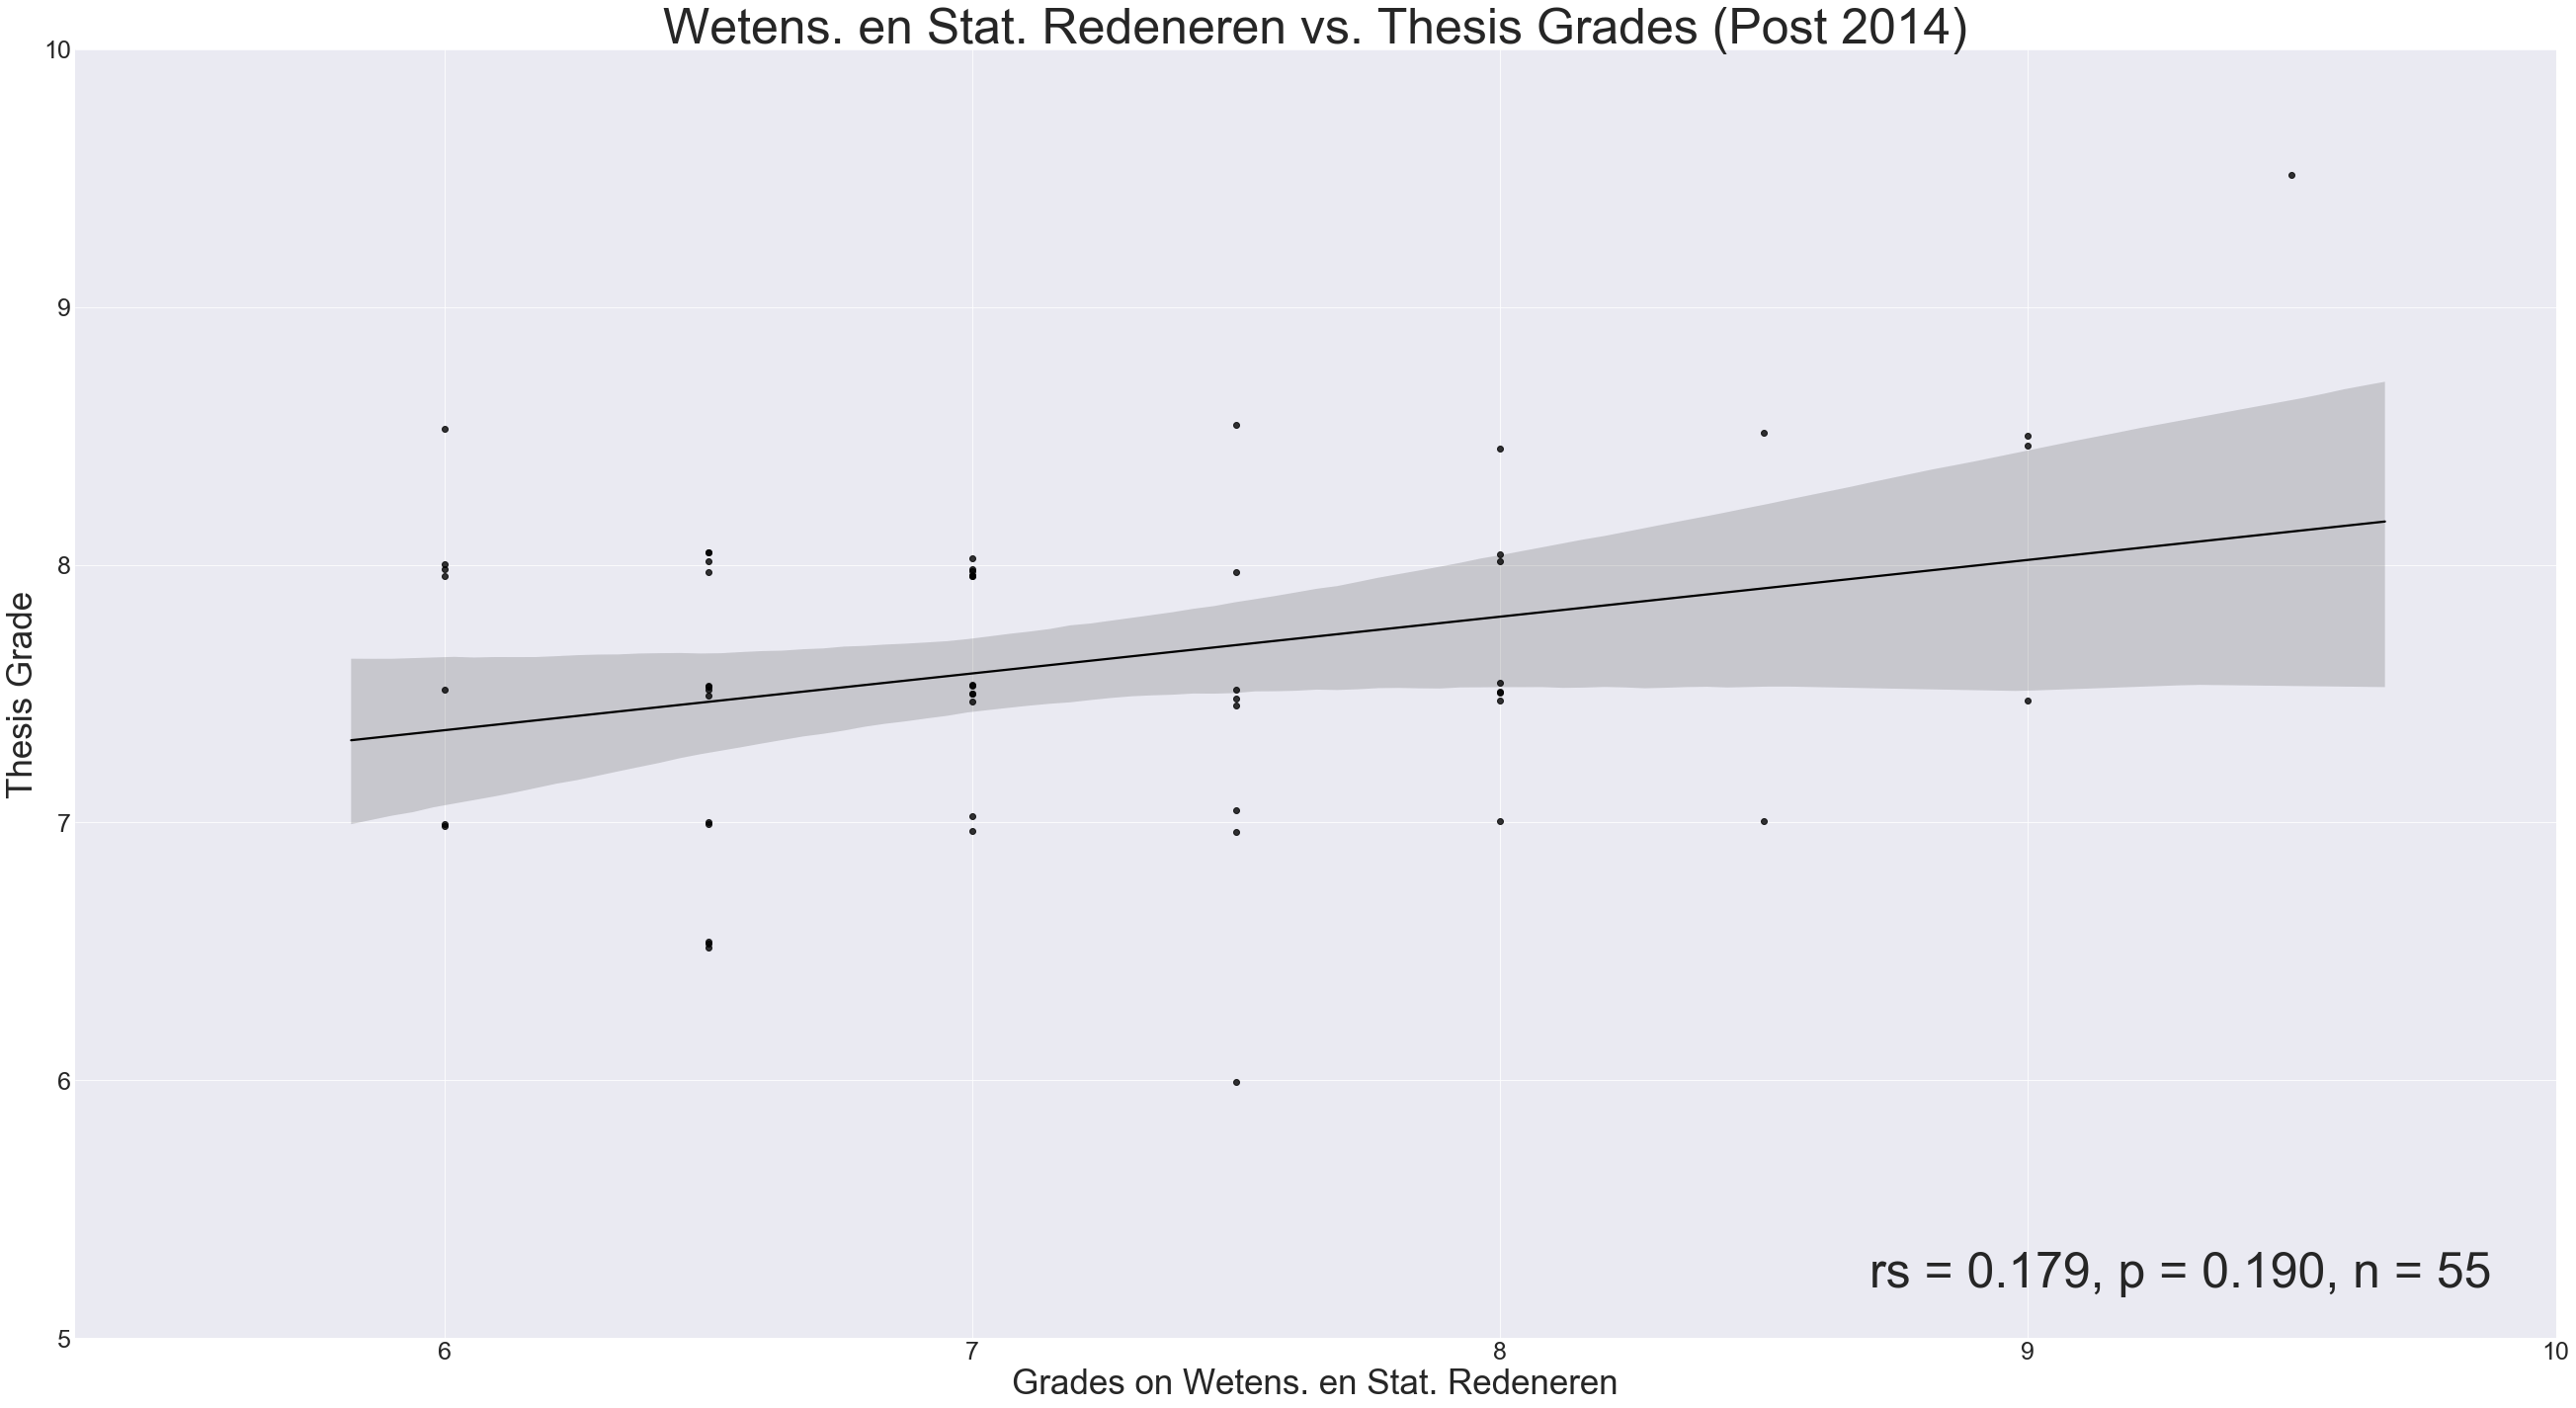

In [66]:
fig, ax = plt.subplots(figsize = (45,24))
sns.regplot(post2[learning[2]], post2['thesis_grades'], color = 'black', y_jitter = 0.05)
plt.xlabel('Grades on ' + learning[2], fontsize = 35)
plt.ylabel('Thesis Grade', fontsize = 35)
plt.title(learning[2] + ' vs. Thesis Grades (Post 2014)', fontsize = 50)
sns.set_style('darkgrid')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_ylim(5,10)
ax.set_xlim(5.3, 10)
ax.text(8.7, 5.2, 'rs = 0.179, p = 0.190, n = 55', fontsize = 50)
plt.show()